# Proyecto 01

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
proyecto_data = np.load('./data/proyecto_training_data.npy')

In [3]:
proyecto_data

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [4]:
type(proyecto_data)

numpy.ndarray

In [5]:
data_train, data_test = train_test_split(proyecto_data, test_size=0.2)

In [6]:
len(data_train)

1168

In [7]:
len(data_test)

292

In [8]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

In [9]:
df_train = df_train.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})
df_test = df_test.rename(columns={0: "SalePrice", 1: "OverallQual", 2: "1stFlrSF", 3: "TotRmsAbvGrd", 4: "YearBuilt", 5: "LotFrontage"})

In [10]:
df_train.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,968.000000
mean,181557.892123,6.123288,1160.820205,6.524829,1971.350171,70.020661
std,80550.933799,1.397834,378.860111,1.635426,30.471414,22.519797
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,130000.000000,5.000000,876.750000,5.000000,1953.000000,60.000000
50%,163995.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,215000.000000,7.000000,1392.000000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,182.000000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1168 non-null   float64
 1   OverallQual   1168 non-null   float64
 2   1stFlrSF      1168 non-null   float64
 3   TotRmsAbvGrd  1168 non-null   float64
 4   YearBuilt     1168 non-null   float64
 5   LotFrontage   968 non-null    float64
dtypes: float64(6)
memory usage: 54.9 KB


In [12]:
np.ptp(data_train, axis=0)

array([7.201e+05, 9.000e+00, 2.894e+03, 1.200e+01, 1.350e+02,       nan])

In [13]:
df_test.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,233.000000
mean,178374.410959,6.003425,1169.852740,6.489726,1970.938356,70.171674
std,74923.083743,1.319946,416.676759,1.587071,29.152690,30.603776
min,75500.000000,3.000000,483.000000,3.000000,1872.000000,21.000000
25%,129000.000000,5.000000,895.500000,5.000000,1954.000000,58.000000
50%,159975.000000,6.000000,1088.500000,6.000000,1971.500000,67.000000
75%,203175.000000,7.000000,1377.250000,7.000000,1998.000000,80.000000
max,625000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     292 non-null    float64
 1   OverallQual   292 non-null    float64
 2   1stFlrSF      292 non-null    float64
 3   TotRmsAbvGrd  292 non-null    float64
 4   YearBuilt     292 non-null    float64
 5   LotFrontage   233 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [15]:
np.ptp(data_test, axis=0)

array([5.495e+05, 7.000e+00, 4.209e+03, 9.000e+00, 1.370e+02,       nan])

<Axes: xlabel='LotFrontage', ylabel='Count'>

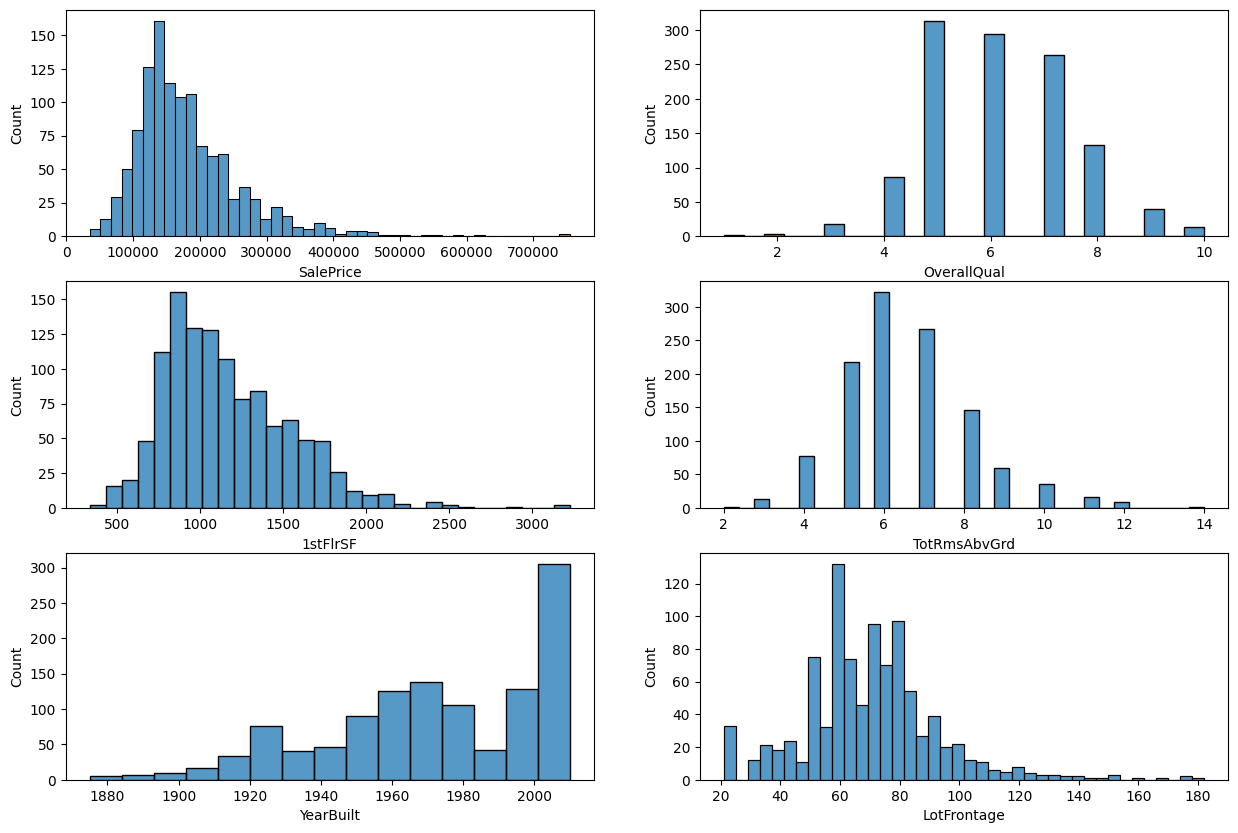

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.histplot(data=df_train["SalePrice"], ax=axes[0,0])
sns.histplot(data=df_train["OverallQual"], ax=axes[0,1])
sns.histplot(data=df_train["1stFlrSF"], ax=axes[1,0])
sns.histplot(data=df_train["TotRmsAbvGrd"], ax=axes[1,1])
sns.histplot(data=df_train["YearBuilt"], ax=axes[2,0])
sns.histplot(data=df_train["LotFrontage"], ax=axes[2,1])

In [17]:
ind_var_columns = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

Corr OverallQual: 0.7977758433630188


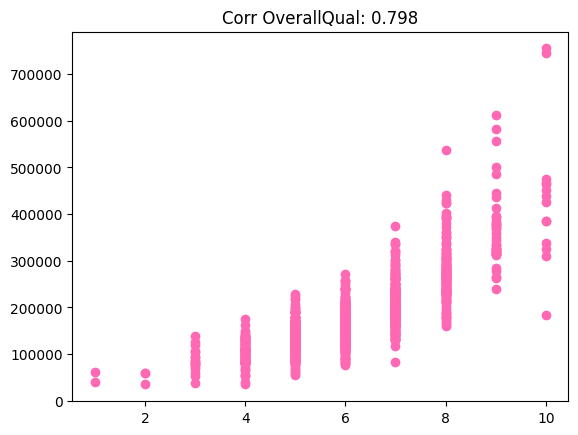

Corr 1stFlrSF: 0.6244504155839721


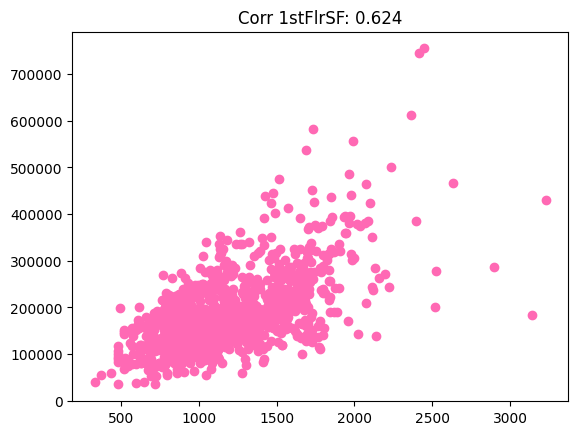

Corr TotRmsAbvGrd: 0.5369232952764863


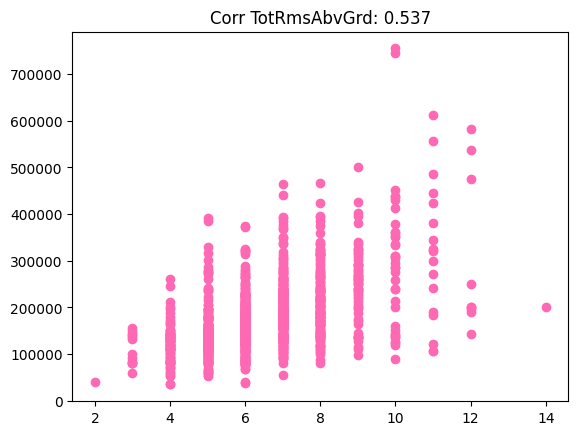

Corr YearBuilt: 0.5273025511424417


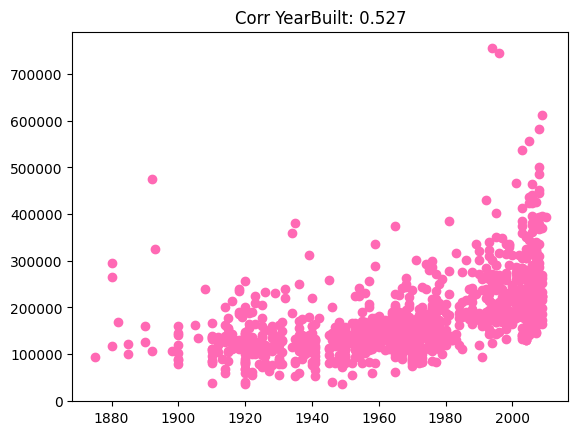

Corr LotFrontage: 0.37708451858295106


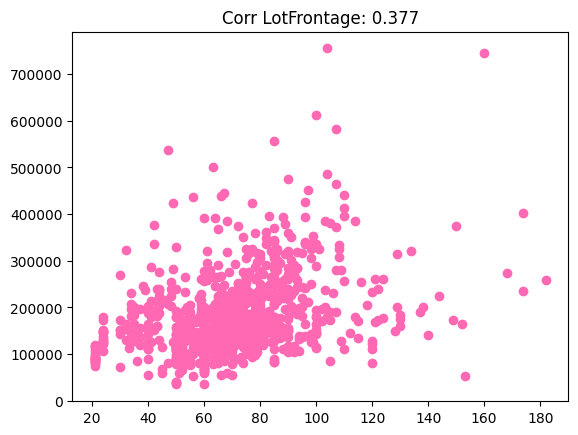

In [18]:
for colName in ind_var_columns:
    corr = df_train[colName].corr(df_train["SalePrice"])
    print(f"Corr {colName}: {corr}")
    plt.scatter(df_train[colName], df_train["SalePrice"], color = 'hotpink')
    plt.title(f"Corr {colName}: {'%.3f' % corr}")
    plt.show()

In [19]:
corr_columns = ["OverallQual", "1stFlrSF"]

In [20]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [21]:
matriz = np.column_stack((x, np.ones(len(x))))

In [22]:
x

0       7.0
1       5.0
2       5.0
3       7.0
4       6.0
       ... 
1163    6.0
1164    6.0
1165    6.0
1166    5.0
1167    5.0
Name: OverallQual, Length: 1168, dtype: float64

In [23]:
x_mean = x.mean()
y_mean = y.mean()

In [24]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1*x_mean)

In [25]:
epochs = 5

In [26]:
y_iter = np.dot(matriz, [B1, B0])

In [27]:
y_iter

array([221862.35120721, 129917.80392201, 129917.80392201, ...,
       175890.07756461, 129917.80392201, 129917.80392201])

In [28]:
error = sum(np.square((y-y_iter)))/(2*len(y))

In [29]:
error

1178440744.6655753

In [30]:
grad_b1 = sum((y_iter-y)*x)/len(y)

In [31]:
grad_b1

-2.0611890885111405e-10

In [32]:
grad_b0 = sum((y_iter-y))/len(y)

In [33]:
grad_b0

-2.299900300647706e-11

## actualizar parametros

In [34]:
alfa = 10000000000

In [35]:
B0 = B0 - alfa*grad_b0
B1 = B1 - alfa*grad_b1

In [36]:
y_iter = np.dot(matriz, [B1, B0])

In [37]:
error_2 = sum(np.square((y-y_iter)))/(2*len(y))

In [38]:
error_2

1178440831.3899117

In [39]:
error

1178440744.6655753

# Como funcion

In [40]:
def regresion_lineal(x,y,epochs,alfa,b0,b1,imprimir_error_cada):
    
    iteration_df = pd.DataFrame(columns=['iter', 'b1', 'b0', 'error'])
    print_count = 0
    
    for i in range(0, epochs):
    
        matriz = np.column_stack((x, np.ones(len(x))))
        y_iter = np.dot(matriz, [b1, b0])

        error = sum(np.square((y-y_iter)))/(2*len(y))
        
        new_row = pd.Series({
            'iter': i+1,
            'b1': b1,
            'b0': b0,
            'error': error
        })
        
        
        iteration_df = pd.concat([iteration_df, new_row.to_frame().T], ignore_index=True)
        
        print_count+=1
        
        if(print_count == imprimir_error_cada):
            print_count = 0
            print( 'Iteracion: {}, error: {}'.format( i+1, error))

        grad_b1 = sum((y_iter-y)*x)/len(y)
        grad_b0 = sum((y_iter-y))/len(y)
        
        b0 = b0 - alfa*grad_b0
        b1 = b1 - alfa*grad_b1
    return iteration_df
    
    

In [41]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)

Iteracion: 500, error: 1242039206.1787837
Iteracion: 1000, error: 1193347052.490736
Iteracion: 1500, error: 1181934508.6292253
Iteracion: 2000, error: 1179259618.5796828


In [42]:
iteration_df

,iter,b1,b0,error
0,1.0,0.010000,0.010000,1.972307e+10
1,2.0,36044.435473,5446.744627,2.269199e+09
2,3.0,28433.058584,4108.765631,1.484318e+09
3,4.0,30074.827360,4209.125514,1.448312e+09
4,5.0,29755.278624,4004.883924,1.445953e+09
...,...,...,...,...
1995,1996.0,45073.027560,-94157.615296,1.179269e+09
1996,1997.0,45074.331245,-94166.003493,1.179267e+09
1997,1998.0,45075.633039,-94174.379528,1.179264e+09
1998,1999.0,45076.932947,-94182.743421,1.179262e+09


In [43]:
def graficar_iter(iter_df):
    ax = plt.gca()
    iter_df.plot(kind='line',x='iter',y='error', color='blue', ax=ax)
    plt.show()

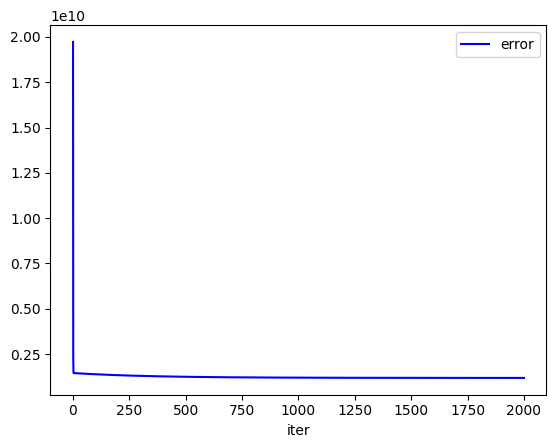

In [44]:
graficar_iter(iteration_df)

In [45]:
def graficar_modelo(x,y,iter_df, cada_cuanta, plot_xy=True):
    if(plot_xy):
        plt.scatter(x, y,  marker='.')
    counter = 1
    for i in range(0, len(iteration_df)):
        if( counter == cada_cuanta):
            plt.plot(x, iter_df.loc[i]['b0'] + iter_df.loc[i]['b1'] *x, linestyle='-')
            counter = 1
        else:
            counter +=1
    plt.show()

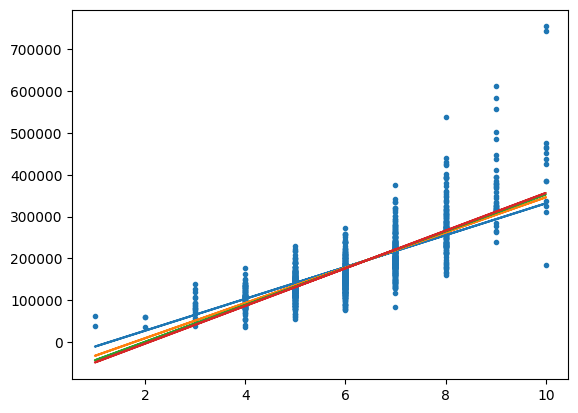

In [46]:
graficar_modelo(x,y,iteration_df,500)

In [47]:
var_elegidas = ["OverallQual", "1stFlrSF"]

In [48]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

Iteracion: 500, error: 1242039206.1787837
Iteracion: 1000, error: 1193347052.490736
Iteracion: 1500, error: 1181934508.6292253
Iteracion: 2000, error: 1179259618.5796828


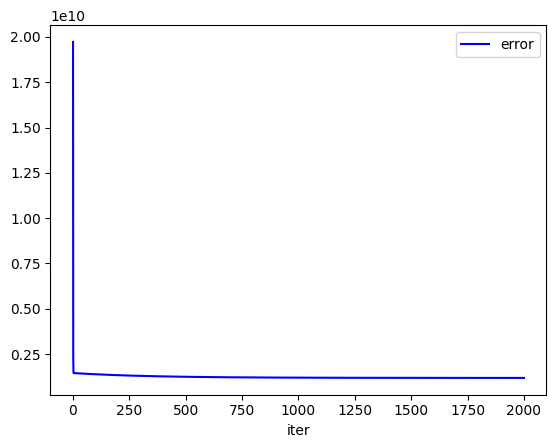

In [49]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)
graficar_iter(iteration_df)

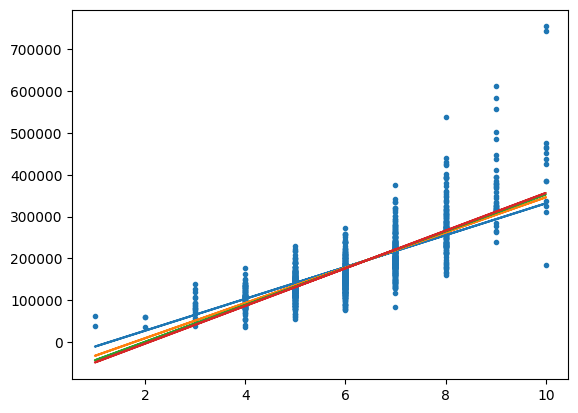

In [50]:
graficar_modelo(x,y,iteration_df,500)

In [51]:
x = df_train["1stFlrSF"]

In [52]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1*x_mean)

In [53]:
B1

12.893542563388387

In [54]:
B0

181478.94125307075

Iteracion: 100, error: 2389530702.3449197
Iteracion: 200, error: 2389522775.415405
Iteracion: 300, error: 2389514848.6383853
Iteracion: 400, error: 2389506922.0138636
Iteracion: 500, error: 2389498995.5418334
Iteracion: 600, error: 2389491069.222288
Iteracion: 700, error: 2389483143.055237
Iteracion: 800, error: 2389475217.0406632
Iteracion: 900, error: 2389467291.178571
Iteracion: 1000, error: 2389459365.4689555


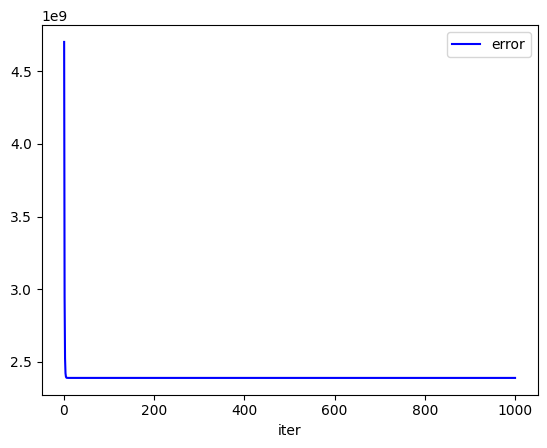

In [55]:
iteration_df = regresion_lineal(x,y,1000,0.000001,120000,5,100)
graficar_iter(iteration_df)

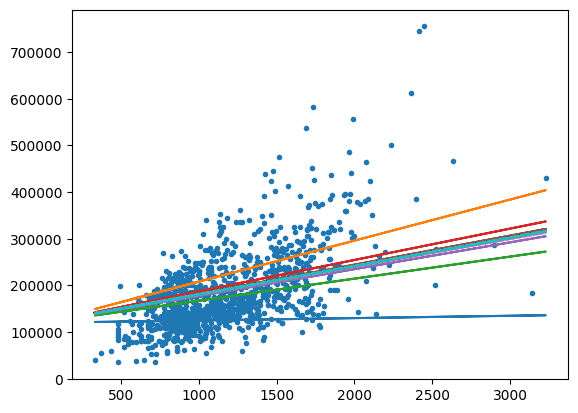

In [56]:
graficar_modelo(x,y,iteration_df,1)

## Scikit-learn

In [57]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [58]:
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

In [59]:
print( 'Intercepto: {}, Coef: {}'.format( reg.intercept_, reg.coef_ ))

Intercepto: [-99943.56429099], Coef: [[45972.2736426]]


In [60]:
x = df_train["1stFlrSF"]
reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
print( 'Intercepto: {}, Coef: {}'.format( reg.intercept_, reg.coef_ ))

Intercepto: [27439.44843276], Coef: [[132.76685137]]


In [61]:
def modelo_scikit(x,y):
    reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
    return reg

## Promedio modelos

In [62]:
x = df_train["OverallQual"]
y = df_train["SalePrice"]

In [63]:
x_test = df_test["OverallQual"]
y_test = df_test["SalePrice"]

In [64]:
iteration_df = regresion_lineal(x,y,2000,0.03,0.01,0.01,500)
modelo_scikit = modelo_scikit(x,y)

Iteracion: 500, error: 1242039206.1787837
Iteracion: 1000, error: 1193347052.490736
Iteracion: 1500, error: 1181934508.6292253
Iteracion: 2000, error: 1179259618.5796828


In [65]:
p1 = modelo_scikit.predict(x_test.values.reshape(-1,1))

In [66]:
p1

array([[221862.35120721],
       [ 83945.53027941],
       [129917.80392201],
       [221862.35120721],
       [175890.07756461],
       [175890.07756461],
       [221862.35120721],
       [129917.80392201],
       [175890.07756461],
       [175890.07756461],
       [267834.62484981],
       [129917.80392201],
       [221862.35120721],
       [129917.80392201],
       [175890.07756461],
       [129917.80392201],
       [221862.35120721],
       [221862.35120721],
       [129917.80392201],
       [129917.80392201],
       [ 83945.53027941],
       [129917.80392201],
       [175890.07756461],
       [267834.62484981],
       [267834.62484981],
       [129917.80392201],
       [ 83945.53027941],
       [175890.07756461],
       [129917.80392201],
       [175890.07756461],
       [359779.17213501],
       [ 83945.53027941],
       [175890.07756461],
       [221862.35120721],
       [129917.80392201],
       [175890.07756461],
       [175890.07756461],
       [ 83945.53027941],
       [2218

In [67]:
iteration_df.tail(1)

,iter,b1,b0,error
1999,2000.0,45078.23097,-94191.095187,1.179260e+09


In [68]:
(iteration_df).iloc[-1]

iter     2.000000e+03
b1       4.507823e+04
b0      -9.419110e+04
error    1.179260e+09
Name: 1999, dtype: float64

In [69]:
p2 = (iteration_df).iloc[-1]['b0'] + (iteration_df).iloc[-1]['b1']*x_test.values.reshape(-1,1)

In [70]:
p2

array([[221356.52159963],
       [ 86121.82869088],
       [131200.05966046],
       [221356.52159963],
       [176278.29063004],
       [176278.29063004],
       [221356.52159963],
       [131200.05966046],
       [176278.29063004],
       [176278.29063004],
       [266434.75256921],
       [131200.05966046],
       [221356.52159963],
       [131200.05966046],
       [176278.29063004],
       [131200.05966046],
       [221356.52159963],
       [221356.52159963],
       [131200.05966046],
       [131200.05966046],
       [ 86121.82869088],
       [131200.05966046],
       [176278.29063004],
       [266434.75256921],
       [266434.75256921],
       [131200.05966046],
       [ 86121.82869088],
       [176278.29063004],
       [131200.05966046],
       [176278.29063004],
       [356591.21450838],
       [ 86121.82869088],
       [176278.29063004],
       [221356.52159963],
       [131200.05966046],
       [176278.29063004],
       [176278.29063004],
       [ 86121.82869088],
       [2213

In [71]:
p1.shape

(292, 1)

In [72]:
p2.shape

(292, 1)

In [73]:
p3 = np.mean( np.array([ p1, p2 ]), axis=0 )

In [74]:
p3

array([[221609.43640342],
       [ 85033.67948514],
       [130558.93179123],
       [221609.43640342],
       [176084.18409733],
       [176084.18409733],
       [221609.43640342],
       [130558.93179123],
       [176084.18409733],
       [176084.18409733],
       [267134.68870951],
       [130558.93179123],
       [221609.43640342],
       [130558.93179123],
       [176084.18409733],
       [130558.93179123],
       [221609.43640342],
       [221609.43640342],
       [130558.93179123],
       [130558.93179123],
       [ 85033.67948514],
       [130558.93179123],
       [176084.18409733],
       [267134.68870951],
       [267134.68870951],
       [130558.93179123],
       [ 85033.67948514],
       [176084.18409733],
       [130558.93179123],
       [176084.18409733],
       [358185.1933217 ],
       [ 85033.67948514],
       [176084.18409733],
       [221609.43640342],
       [130558.93179123],
       [176084.18409733],
       [176084.18409733],
       [ 85033.67948514],
       [2216

In [75]:
def avg_models(manual_model, modelo_scikit, x_test):
    pred_modelo_manual = (manual_model).iloc[-1]['b0'] + (manual_model).iloc[-1]['b1']*x_test.values.reshape(-1,1)
    pred_scikit = modelo_scikit.predict(x_test.values.reshape(-1,1))
    avg_pred = np.mean( np.array([ pred_modelo_manual, pred_scikit ]), axis=0 )
    return pred_modelo_manual, pred_scikit, avg_pred
    

In [76]:
pred_modelo_manual, pred_scikit, avg_pred = avg_models(iteration_df, modelo_scikit, x_test)

In [77]:
pred_modelo_manual[0:3]

array([[221356.52159963],
       [ 86121.82869088],
       [131200.05966046]])

In [78]:
pred_scikit[0:3]

array([[221862.35120721],
       [ 83945.53027941],
       [129917.80392201]])

In [79]:
avg_pred[0:3]

array([[221609.43640342],
       [ 85033.67948514],
       [130558.93179123]])

In [80]:
def plot_errores(error_values, title):
    plt.plot(error_values)
    plt.title(title)
    plt.yscale('linear')
    #plt.xlabel('No. Iteracion')
    #plt.ylabel('Error')
    plt.show()

In [91]:
def err_modelos( pred_modelo_manual,pred_scikit, avg_pred, y_test):
    yt = y_test.values.reshape(-1,1)
    err_modelo_manual = (0.5/len(y_test))*(yt-pred_modelo_manual)**2
    err_scikit = (0.5/len(y_test))*(yt - pred_scikit)**2
    err_avg_pred = (0.5/len(y_test))*(yt - avg_pred)**2
    
    plot_errores(err_modelo_manual,"Modelo Manual")
    plot_errores(err_scikit,"Modelo Scikit")
    plot_errores(err_avg_pred,"Modelo Avg")
    
    print( 'Error modelo manual: {}, Error modelo scikit: {}, error modelo avg: {}'.format( sum(err_modelo_manual), sum(err_scikit), sum(err_avg_pred)))
    
    dict1 = {
        'modelo': ['manual','scikit','avg'],
        'error': [sum(err_modelo_manual)[0], sum(err_scikit)[0], sum(err_avg_pred)[0]]
    }

    df_err = pd.DataFrame(dict1)
    print(df_err)

    print( 'Mejor modelo a ser usado (menor error):')
    print( df_err[df_err['error'] == df_err['error'].min()])


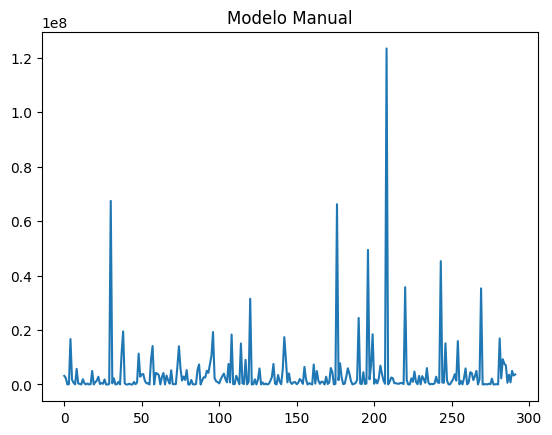

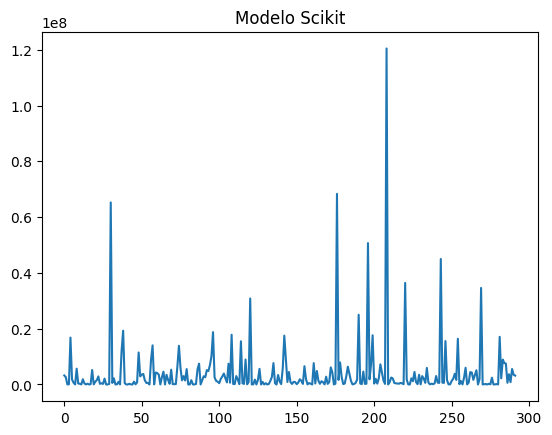

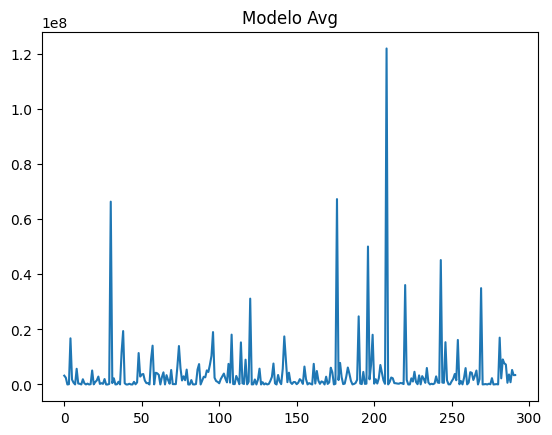

Error modelo manual: [1.18597727e+09], Error modelo scikit: [1.19048963e+09], error modelo avg: [1.18804143e+09]
   modelo         error
0  manual  1.185977e+09
1  scikit  1.190490e+09
2     avg  1.188041e+09
Mejor modelo a ser usado (menor error):
   modelo         error
0  manual  1.185977e+09


In [92]:
err_modelos( pred_modelo_manual,pred_scikit, avg_pred, y_test)